## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [49]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [10]:
model = linear_model.LinearRegression()

model.fit(train_X, train_y)
pred_y = model.predict(test_X)

mean_squared_error(pred_y, test_y)

19.831323672063235

In [28]:
def L1(x):
    model = linear_model.Lasso(alpha = x)

    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)

    return mean_squared_error(pred_y, test_y)
L1(0.03)

19.51090478242543

In [43]:
parameter = np.linspace(0, 1, 1000)
y1 = np.zeros(1000)

for i in range(1000):
    y1[i] = L1(parameter[i])
y1

C:\Users\Eric\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Eric\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4161.860197530881, tolerance: 2.8740928389830507
  positive)


array([19.83132367, 19.81101123, 19.79136366, 19.77237932, 19.75405932,
       19.73640489, 19.71941431, 19.70308754, 19.6874276 , 19.67242876,
       19.65809375, 19.64442603, 19.63141898, 19.6190794 , 19.60740388,
       19.59639185, 19.58618398, 19.57649834, 19.5674718 , 19.55911154,
       19.55141394, 19.54437901, 19.53800687, 19.53229416, 19.52724759,
       19.52286374, 19.51914261, 19.51608112, 19.51368547, 19.51195254,
       19.51088232, 19.51047237, 19.51072764, 19.51164562, 19.5132269 ,
       19.51547571, 19.51839189, 19.52197989, 19.52621852, 19.53298414,
       19.54102982, 19.54965758, 19.5588372 , 19.5685789 , 19.57672936,
       19.58550909, 19.59493607, 19.60501396, 19.61573581, 19.62710496,
       19.63912141, 19.65179322, 19.6651046 , 19.67906328, 19.69366927,
       19.70893691, 19.72483797, 19.74138634, 19.75860435, 19.77644806,
       19.79494012, 19.81408   , 19.83386657, 19.85429981, 19.87537767,
       19.89709762, 19.91607101, 19.92493153, 19.93380689, 19.94

In [39]:
def L2(x):
    model = linear_model.Ridge(alpha = x)

    model.fit(train_X, train_y)
    pred_y = model.predict(test_X)

    return mean_squared_error(pred_y, test_y)
L2(0.03)

19.786171707578035

In [44]:
parameter = np.linspace(0, 1, 1000)
y2 = np.zeros(1000)

for i in range(1000):
    y2[i] = L2(parameter[i])
y2

array([19.83132367, 19.82974508, 19.82817164, 19.82660333, 19.82504014,
       19.82348203, 19.821929  , 19.82038102, 19.81883807, 19.81730014,
       19.81576721, 19.81423925, 19.81271624, 19.81119818, 19.80968503,
       19.80817678, 19.80667342, 19.80517492, 19.80368126, 19.80219243,
       19.80070841, 19.79922918, 19.79775472, 19.79628501, 19.79482004,
       19.79335979, 19.79190424, 19.79045336, 19.78900716, 19.7875656 ,
       19.78612867, 19.78469635, 19.78326862, 19.78184548, 19.78042689,
       19.77901285, 19.77760333, 19.77619832, 19.7747978 , 19.77340176,
       19.77201018, 19.77062304, 19.76924033, 19.76786202, 19.76648811,
       19.76511857, 19.7637534 , 19.76239256, 19.76103606, 19.75968386,
       19.75833597, 19.75699235, 19.75565299, 19.75431789, 19.75298701,
       19.75166036, 19.7503379 , 19.74901963, 19.74770553, 19.74639558,
       19.74508978, 19.7437881 , 19.74249053, 19.74119705, 19.73990765,
       19.73862232, 19.73734104, 19.73606379, 19.73479056, 19.73

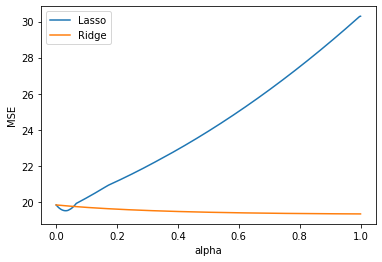

In [54]:

plt.plot(parameter, y1, label = 'Lasso')
plt.plot(parameter, y2, label = 'Ridge')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()